<a href="https://colab.research.google.com/github/bhargav191098/CV_Basics/blob/main/image_classification_cifar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
#Last import can be used to transform dataset images on the go - normalize,convert to tensor.

In [ ]:
transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])


batch_sizes = 4

trainset = torchvision.datasets.CIFAR10(root='./data',train=True,transform=transform,download=True)
testset = torchvision.datasets.CIFAR10(root='./data',train=False,transform=transform,download=True)

train_loader = torch.utils.data.DataLoader(trainset,batch_size = batch_sizes,num_workers = 3,shuffle=True)
test_loader = torch.utils.data.DataLoader(testset,batch_size = batch_sizes,num_workers=3,shuffle=True)

classes = ('plane','car','bird','cat','deer','dog','frog','horse','ship','truck')



100%|██████████| 170498071/170498071 [00:01<00:00, 106408067.97it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 3 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


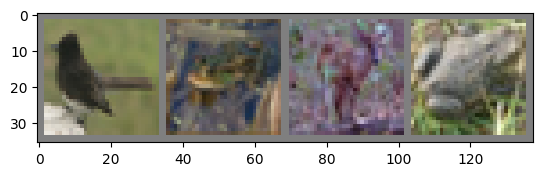

bird  frog  deer  frog 


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
  img = img/2 + 0.5
  npimg = img.numpy()

  plt.imshow(np.transpose(npimg,(1,2,0)))
  plt.show()


dataiter = iter(train_loader)
img,label = next(dataiter)

imshow(torchvision.utils.make_grid(img))

print(' '.join(f'{classes[label[j]]:5s}' for j in range(batch_sizes)))



In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
  def __init__(self, *args, **kwargs) -> None:
    super().__init__(*args, **kwargs)
    self.conv1 = nn.Conv2d(3,6,5)
    self.pool = nn.MaxPool2d(2,2) #Doesnt affect the channel.
    self.conv2 = nn.Conv2d(6,16,5)
    self.fc1 = nn.Linear(16*5*5,120)
    self.fc2 = nn.Linear(120,84)
    self.fc3 = nn.Linear(84,10)


  def forward(self,x):
    x = self.pool(F.relu(self.conv1(x)))
    x = self.pool(F.relu(self.conv2(x)))

    x = torch.flatten(x,1)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))

    x = self.fc3(x)
    return x

net = Net()

In [ ]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(),lr=0.001,momentum=0.9)

In [ ]:
from torch.utils.data import dataloader
num_epochs = 20
device = torch.device('cuda:0' if torch.cuda.is_available else 'cpu')
for epoch in range(num_epochs):
  total_loss = 0.0
  num_item = 0
  for data in train_loader:
    input,labels = data
    optimizer.zero_grad()

    outputs = net(input)
    loss = criterion(outputs,labels)
    loss.backward()
    optimizer.step()
    num_item += batch_sizes
    total_loss += loss.item()

  if(epoch%10==0):
    print("average loss : ",total_loss/num_item)
print('Training done')

average loss :  0.31018818373031914
average loss :  0.1878993231306941
Training done
